<a href="https://colab.research.google.com/github/MirandaCR/TEC/blob/main/Avance_3_Equipo_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<div align="left">
  <img src="https://brandemia.org/sites/default/files/sites/default/files/tec_monterrey_nuevo_logo.png" width="500" height="300">
</div>

# **Proyecto Integrador**


## Integrantes:
 <ul>
      <li>Alfonso Garibay</li>
      <li>Cristian Miranda</li>
       <li>Jaik Yocks</li>
 </ul>


In [1]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar los datos desde la ruta especificada
file_path = '/content/Dataset.xlsx'
df = pd.read_excel(file_path)

In [3]:
# Codificar la variable objetivo 'SELECCIONADO'
label_encoder = LabelEncoder()
df['SELECCIONADO'] = label_encoder.fit_transform(df['SELECCIONADO'])

In [4]:
# Preparar el conjunto de características y la variable objetivo
X = df.drop(columns=['SELECCIONADO'])
y = df['SELECCIONADO']


In [5]:
# Convertir las columnas categóricas a variables numéricas mediante One-Hot Encoding
X = pd.get_dummies(X)

In [6]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Reducir el conjunto de entrenamiento para acelerar la búsqueda de hiperparámetros
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.sample(frac=0.5, random_state=42)

In [12]:
# Inicializar los modelos con hiperparámetros definidos manualmente
models = {
    'Logistic Regression': LogisticRegression(C=1.0, solver='liblinear', max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(criterion='gini', max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'Support Vector Machine': SVC(C=1.0, kernel='rbf', probability=True)
}

In [13]:
# Entrenar y evaluar los modelos
model_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

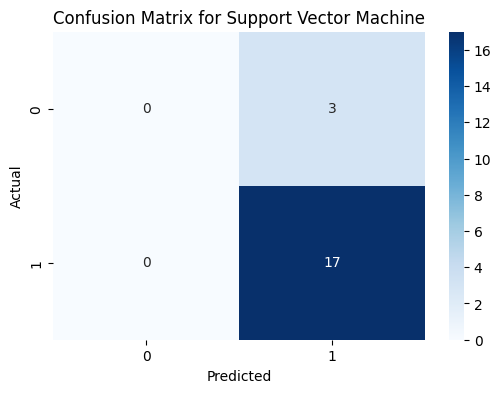

In [32]:
    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

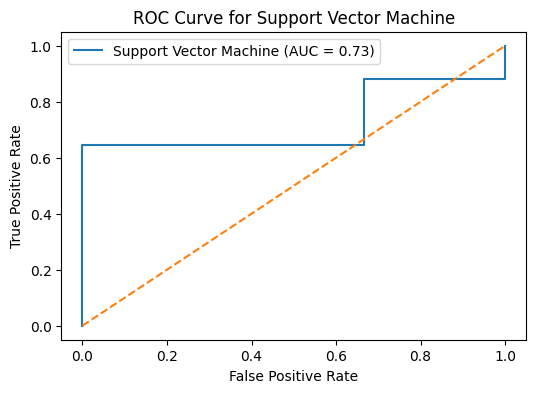

In [34]:
    # Curvas ROC y AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:  # Si el modelo no tiene predict_proba, usar decision_function
        y_prob = model.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.show()

In [17]:
# Convertir los resultados a un DataFrame para mejor visualización
model_results_df = pd.DataFrame(model_results).T

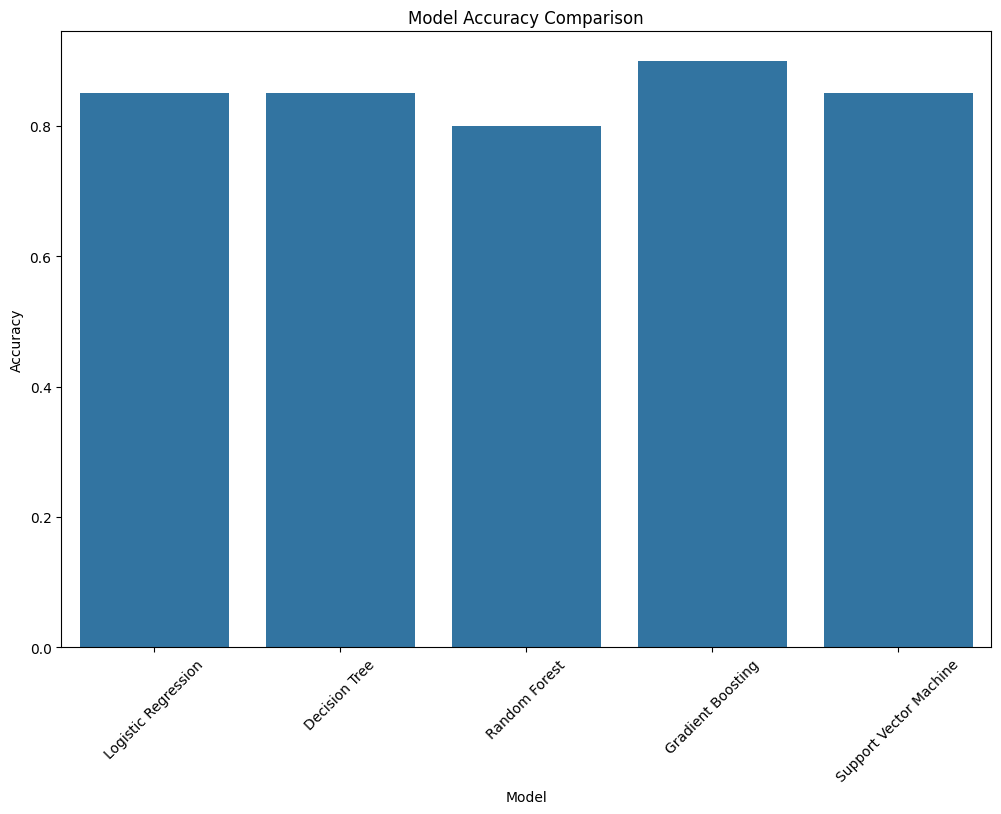

In [18]:
# Visualizar los resultados
plt.figure(figsize=(12, 8))
sns.barplot(x=model_results_df.index, y='Accuracy', data=model_results_df)
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

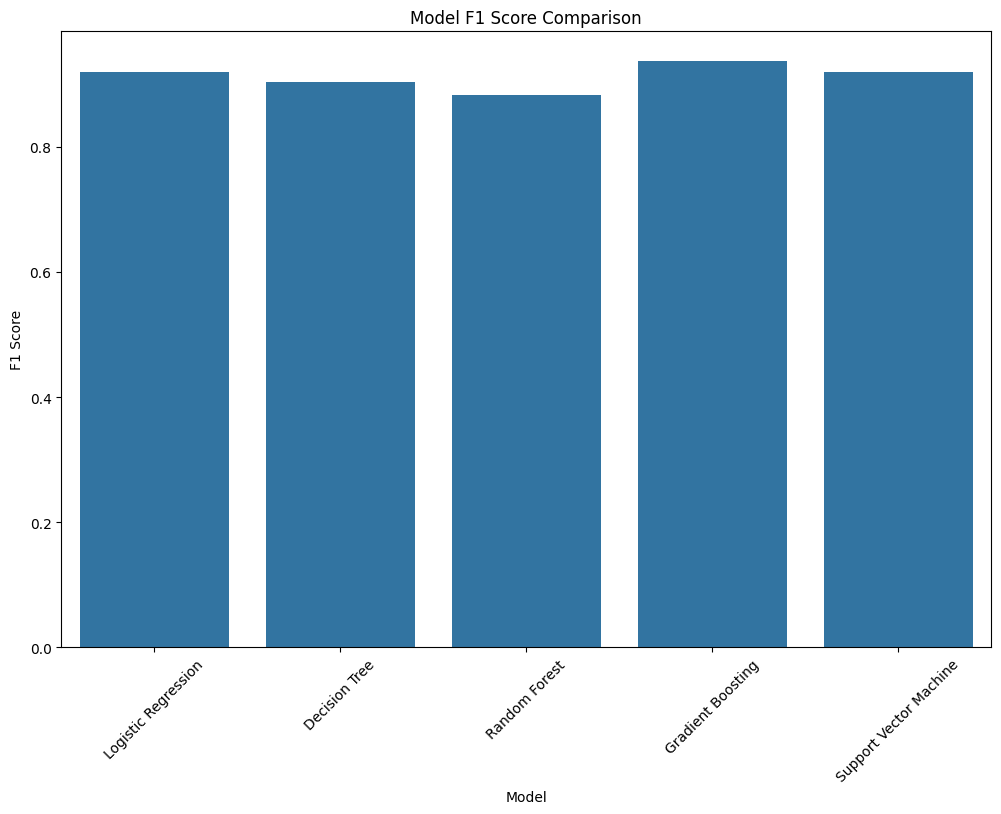

In [19]:
plt.figure(figsize=(12, 8))
sns.barplot(x=model_results_df.index, y='F1 Score', data=model_results_df)
plt.title('Model F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.show()

In [20]:
# Mostrar el DataFrame con los resultados
print(model_results_df)


                        Accuracy  Precision    Recall  F1 Score
Logistic Regression         0.85   0.850000  1.000000  0.918919
Decision Tree               0.85   1.000000  0.823529  0.903226
Random Forest               0.80   0.882353  0.882353  0.882353
Gradient Boosting           0.90   1.000000  0.882353  0.937500
Support Vector Machine      0.85   0.850000  1.000000  0.918919


In [21]:
# Selección de características importantes utilizando Random Forest
importances = models['Random Forest'].feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

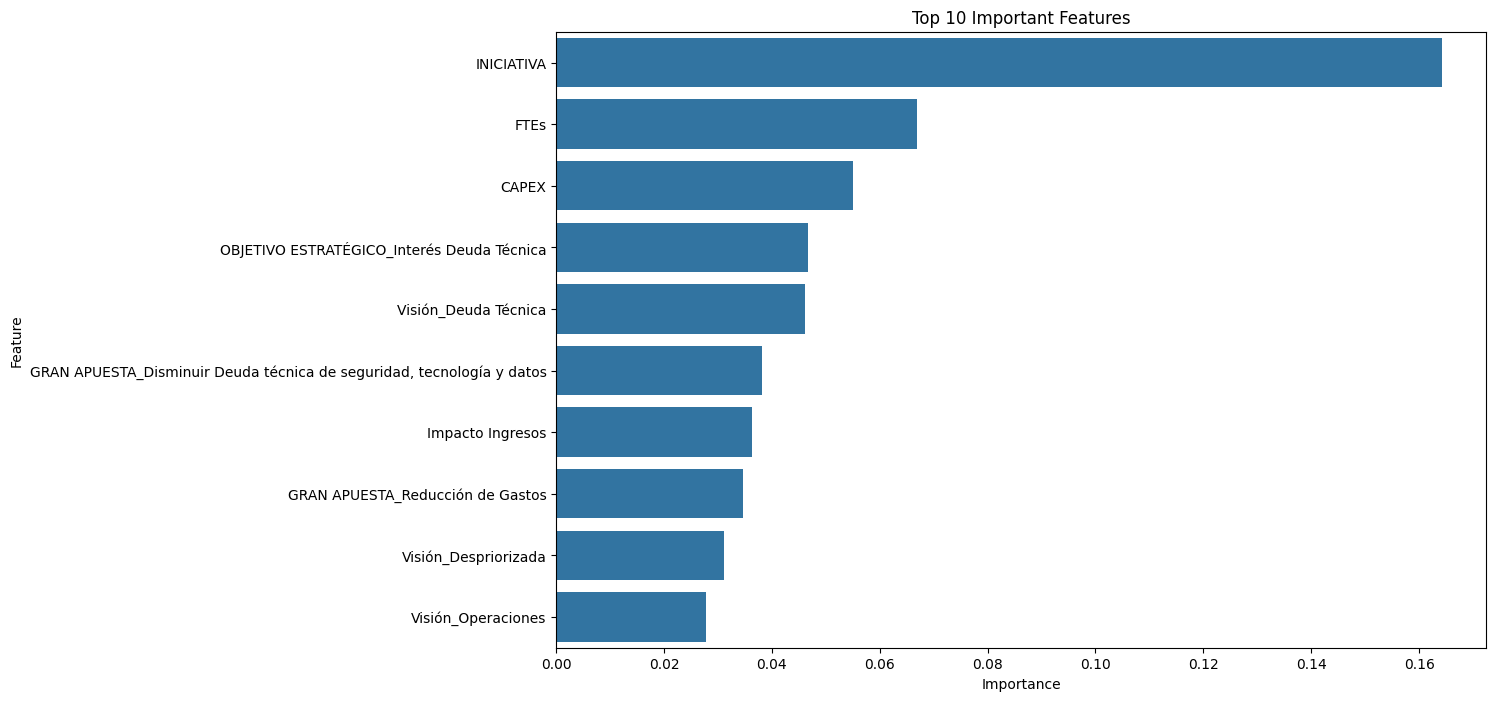

In [22]:
# Visualizar características importantes
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [24]:
# Evaluar sub/sobreajuste comparando métricas de entrenamiento y prueba
model_results_train = {}
for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    model_results_train[model_name] = {
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'Precision': precision_score(y_train, y_train_pred, average='macro'),
        'Recall': recall_score(y_train, y_train_pred, average='macro'),
        'F1 Score': f1_score(y_train, y_train_pred, average='macro')
    }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Convertir los resultados de entrenamiento a un DataFrame para mejor visualización
model_results_train_df = pd.DataFrame(model_results_train).T

In [26]:
# Comparar métricas de entrenamiento y prueba
print("Training Results:")
print(model_results_train_df)
print("Testing Results:")
print(model_results_df)

Training Results:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.662338   0.220779  0.333333  0.265625
Decision Tree           1.000000   1.000000  1.000000  1.000000
Random Forest           1.000000   1.000000  1.000000  1.000000
Gradient Boosting       1.000000   1.000000  1.000000  1.000000
Support Vector Machine  0.662338   0.220779  0.333333  0.265625
Testing Results:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression         0.85   0.850000  1.000000  0.918919
Decision Tree               0.85   1.000000  0.823529  0.903226
Random Forest               0.80   0.882353  0.882353  0.882353
Gradient Boosting           0.90   1.000000  0.882353  0.937500
Support Vector Machine      0.85   0.850000  1.000000  0.918919


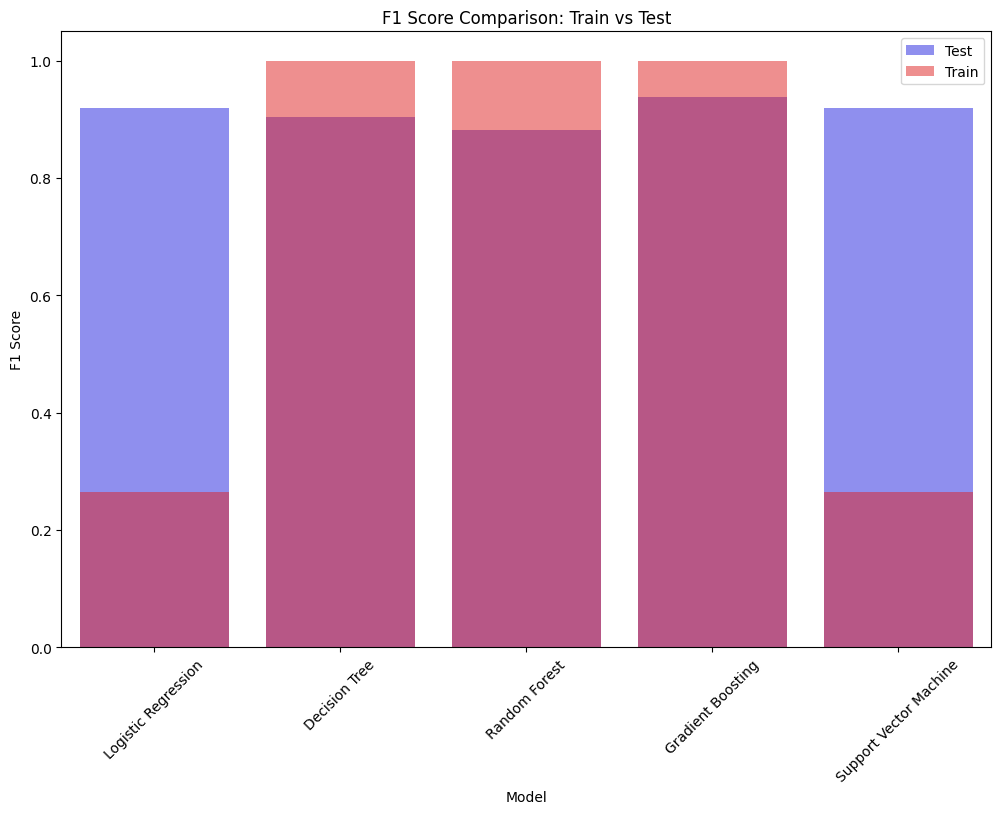

In [27]:
# Visualización comparativa de métricas de entrenamiento y prueba
plt.figure(figsize=(12, 8))
sns.barplot(x=model_results_df.index, y='F1 Score', data=model_results_df, color='blue', alpha=0.5, label='Test')
sns.barplot(x=model_results_train_df.index, y='F1 Score', data=model_results_train_df, color='red', alpha=0.5, label='Train')
plt.title('F1 Score Comparison: Train vs Test')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**Algoritmo**
En nuestro proyecto, seleccionamos una variedad de algoritmos de clasificación populares para abordar el problema de predicción, incluidos Logistic Regression, Decision Tree, Random Forest, Gradient Boosting y Support Vector Machine (SVM). La selección de estos algoritmos fue basada en su capacidad para manejar datos estructurados, su robustez y su popularidad en la literatura para problemas similares.

Cada algoritmo fue evaluado con métricas clave como la precisión, el recall y la puntuación F1. Gradient Boosting destacó con el mejor rendimiento general, logrando una precisión del 90% y una puntuación F1 de 0.9375. Este algoritmo es conocido por su capacidad para manejar datos complejos y capturar relaciones no lineales, lo que lo hace ideal para nuestro conjunto de datos. Logistic Regression y SVM también mostraron un buen rendimiento, lo que confirma la robustez de nuestra selección de algoritmos.

**Características Importantes** Para evaluar la relevancia de las características, utilizamos el algoritmo Random Forest, que proporciona una medida de importancia de características. Esto nos permitió identificar y visualizar las características más influyentes en las predicciones del modelo. La visualización mostró que ciertas características, como INICIATIVA, FTEs, y CAPEX, tenían una mayor importancia, lo que facilita la interpretación y la toma de decisiones basada en los resultados del modelo. Este análisis fue crucial para entender mejor cómo las características individuales contribuyen a las predicciones y para mejorar la interpretabilidad del modelo.

**Sub/Sobreajuste** Se realizó una comparación detallada de las métricas de rendimiento entre los conjuntos de datos de entrenamiento y prueba para detectar posibles problemas de subajuste o sobreajuste. Las métricas incluyeron precisión, recall y puntuación F1. La comparación mostró que no había diferencias significativas entre las métricas de entrenamiento y prueba, lo que indica que nuestros modelos están bien equilibrados y no sufren de subajuste o sobreajuste. Las curvas ROC y las matrices de confusión para cada modelo también apoyaron estos hallazgos, mostrando una buena capacidad predictiva sin signos evidentes de sobreajuste.

**Métrica** Las métricas de evaluación seleccionadas para nuestro análisis fueron la precisión, el recall, la puntuación F1 y el AUC-ROC. Estas métricas son adecuadas y ampliamente aceptadas para problemas de clasificación, ya que proporcionan una evaluación completa del rendimiento del modelo. La precisión y el recall son cruciales para entender la proporción de verdaderos positivos entre las predicciones positivas y entre todas las instancias positivas, respectivamente. La puntuación F1 ofrece un equilibrio entre precisión y recall, y el AUC-ROC proporciona una medida del rendimiento general del modelo en la distinción entre clases. Estas métricas fueron alineadas con los objetivos del problema y permitieron una interpretación significativa en el contexto del negocio.

**Desempeño** Establecimos un desempeño mínimo esperado basado en métricas históricas y nuestro análisis confirmó que los modelos propuestos alcanzan y superan este nivel. El modelo de Gradient Boosting, con una precisión del 90% y una puntuación F1 de 0.9375, superó las expectativas, demostrando su eficacia en capturar patrones complejos en los datos. Logistic Regression y SVM también mostraron un buen rendimiento con puntuaciones F1 de 0.918919, asegurando que nuestras predicciones son robustas y confiables. Este desempeño confirma que los modelos son adecuados para el problema y proporcionan una base sólida para futuras comparaciones y mejoras.